In [32]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [33]:
df_us = df[df["job_country"] == "United States"].dropna(subset="salary_year_avg").copy()

In [34]:
job_titles = df_us["job_title_short"].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [35]:
df_us_top6 = df_us[df_us["job_title_short"].isin(job_titles)].copy()

In [36]:
job_order = df_us_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

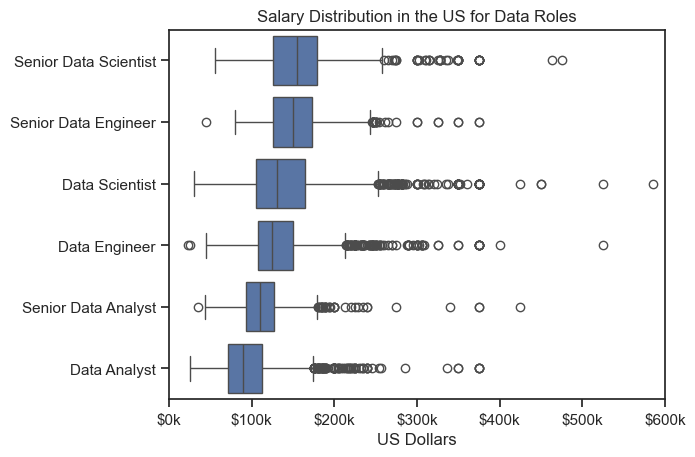

In [37]:
sns.boxplot(data=df_us_top6, y="job_title_short", x="salary_year_avg", order=job_order)

plt.title("Salary Distribution in the US for Data Roles")
plt.xlabel("US Dollars")
plt.ylabel("")
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
plt.show()

## Investigating the Median Salary VS Skill for Data Analysts

In [38]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [39]:
df_DA_US = df_DA_US.explode('job_skills').dropna(subset="salary_year_avg")

In [40]:
df_DA_top_pay = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="median",ascending=False)

In [41]:
df_DA_top_pay = df_DA_top_pay.head(10)

In [42]:
df_DA_most_in_demand_skill = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count",ascending=False)

In [43]:
df_DA_most_in_demand_skill = df_DA_most_in_demand_skill.head(10)
df_DA_most_in_demand_skill =df_DA_most_in_demand_skill.sort_values(by="median",ascending=False)

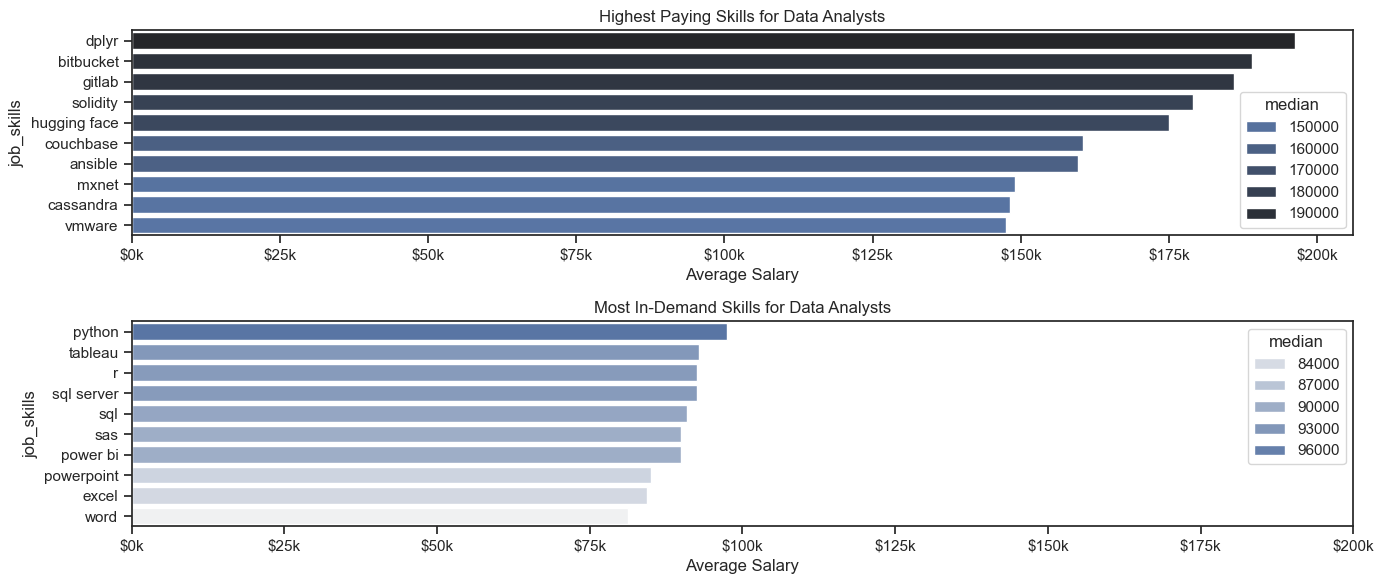

In [46]:

# Assuming:
# skill_stats1: DataFrame for top 10 highest paying skills
# skill_stats2: DataFrame for most in-demand skills (with skill_count and salary_avg)

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

# First plot: Highest paying skills
# skill_stats1.plot(kind="barh", y="salary_avg",color="skyblue", ax=ax[0], legend=False)
sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r")

ax[0].set_title("Highest Paying Skills for Data Analysts")
ax[0].set_xlabel("Average Salary")
# ax[0].invert_yaxis()  # highest on top
ax[0].set_xlim(ax[0].get_xlim())
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f"${int(x/1000)}k"))

# Second plot: Most in-demand skills
# skill_stats.plot(kind="barh", y="salary_avg",color="lightgreen", ax=ax[1], legend=False)

sns.barplot(data=df_DA_most_in_demand_skill, x="median", y=df_DA_most_in_demand_skill.index, ax=ax[1], hue="median", palette="light:b")


ax[1].set_title("Most In-Demand Skills for Data Analysts")
ax[1].set_xlabel("Average Salary")
# ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f"${int(x/1000)}k"))
ax[1].set_xlim(0, 200000)


plt.tight_layout()
plt.show()
